## Create Dataset

In [1]:
import os
import numpy as np
from PIL import Image

In [2]:
dataset = []
labels = []

In [3]:
for filename in os.listdir("dataset"):
    if filename.endswith(".png"):
        img_path = os.path.join("dataset", filename)
        im = Image.open(img_path).convert('L')
        dataset.append(np.asarray(im, dtype=np.float32))
        labels.append(filename.replace(".png", ""))

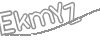

In [5]:
Image.fromarray(np.array(dataset[1], dtype=np.uint8))

In [6]:
labels[1]

'ekmyz'

In [7]:
ch2index = {}
index2ch = {}
index = 0
for label in labels:
    for ch in label:
        if ch not in ch2index.keys():
            ch2index[ch] = index
            index2ch[index] = ch
            index += 1

In [8]:
ch2index

{'4': 0,
 'q': 1,
 'p': 2,
 '5': 3,
 'b': 4,
 'e': 5,
 'k': 6,
 'm': 7,
 'y': 8,
 'z': 9,
 '3': 10,
 'f': 11,
 'u': 12,
 '2': 13,
 'c': 14,
 '7': 15,
 'd': 16,
 'x': 17,
 's': 18,
 'h': 19,
 'v': 20,
 'g': 21,
 '8': 22,
 'n': 23,
 'r': 24,
 'a': 25,
 'w': 26,
 '6': 27,
 'o': 28,
 't': 29,
 '1': 30,
 'l': 31,
 'j': 32,
 '9': 33,
 'i': 34,
 '0': 35}

In [9]:
print("total char type:", len(ch2index))

total char type: 36


In [10]:
y0 = []
y1 = []
y2 = []
y3 = []
y4 = []

for label in labels:
    y0.append(ch2index[label[0]])
    y1.append(ch2index[label[1]])
    y2.append(ch2index[label[2]])
    y3.append(ch2index[label[3]])
    y4.append(ch2index[label[4]])

In [11]:
len(y0)

11303

In [12]:
X_train = np.array(dataset[:10000]).reshape(-1, 40, 100, 1)
y_train = [
    np.array(y0[:10000]),
    np.array(y1[:10000]),
    np.array(y2[:10000]),
    np.array(y3[:10000]),
    np.array(y4[:10000]),
]

In [13]:
X_train.shape

(10000, 40, 100, 1)

In [14]:
X_test = np.array(dataset[10000:]).reshape(-1, 40, 100, 1)
y_test = [
    np.array(y0[10000:]),
    np.array(y1[10000:]),
    np.array(y2[10000:]),
    np.array(y3[10000:]),
    np.array(y4[10000:]),
]

In [15]:
X_test.shape

(1303, 40, 100, 1)

## Train the Network

In [16]:
from keras.layers import Activation, Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from keras.models import Model
from keras.layers.merge import Concatenate


def build_model():
    input_ = Input(shape=(40, 100, 1))

    # conv layer 1
    model = BatchNormalization()(input_)
    model = Conv2D(64, (5, 5), activation ='relu', padding='same')(model)
    model = MaxPool2D(pool_size=(2, 2))(model)

    # conv layer 2
    model = BatchNormalization()(model)
    model = Conv2D(128, (5, 5), activation ='relu', padding='valid')(model)
    model = MaxPool2D(pool_size=(2, 2))(model)

    # conv layer 3
    model = BatchNormalization()(model)
    model = Conv2D(256, (5, 5), activation ='relu', padding='valid')(model)
    model = MaxPool2D(pool_size=(2, 2))(model)
    model = Dropout(0.5)(model)

    # fully connected layer
    model = Flatten()(model)
    model = Dense(1024, activation='relu')(model)
    model = Dropout(0.5)(model)
    model = Dense(512, activation='relu')(model)

    x0 = Dense(36, activation='softmax')(model)
    x1 = Dense(36, activation='softmax')(model)
    x2 = Dense(36, activation='softmax')(model)
    x3 = Dense(36, activation='softmax')(model)
    x4 = Dense(36, activation='softmax')(model)

    x = [x0, x1, x2, x3, x4]

    model = Model(inputs=input_, outputs=x)
    return model

Using TensorFlow backend.


In [17]:
model = build_model()

In [18]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40, 100, 1)   0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 40, 100, 1)   4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 40, 100, 64)  1664        batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 20, 50, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_norm

In [19]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
10000/10000 [==============================] - 130s 13ms/step - loss: 17.4039 - dense_3_loss: 3.4982 - dense_4_loss: 3.4715 - dense_5_loss: 3.4784 - dense_6_loss: 3.4839 - dense_7_loss: 3.4718 - dense_3_acc: 0.0537 - dense_4_acc: 0.0573 - dense_5_acc: 0.0566 - dense_6_acc: 0.0555 - dense_7_acc: 0.0532
Epoch 2/20
10000/10000 [==============================] - 128s 13ms/step - loss: 16.0153 - dense_3_loss: 3.1650 - dense_4_loss: 3.1789 - dense_5_loss: 3.2152 - dense_6_loss: 3.2110 - dense_7_loss: 3.2452 - dense_3_acc: 0.0993 - dense_4_acc: 0.0992 - dense_5_acc: 0.0889 - dense_6_acc: 0.0953 - dense_7_acc: 0.0823
Epoch 3/20
10000/10000 [==============================] - 129s 13ms/step - loss: 14.5875 - dense_3_loss: 2.6951 - dense_4_loss: 2.8213 - dense_5_loss: 2.9941 - dense_6_loss: 3.0402 - dense_7_loss: 3.0368 - dense_3_acc: 0.2005 - dense_4_acc: 0.1867 - dense_5_acc: 0.1458 - dense_6_acc: 0.1419 - dense_7_acc: 0.1405
Epoch 4/20
10000/10000 [==============================] - 

In [21]:
model.fit(X_train, y_train, batch_size=64, epochs=20) # train another 20 epochs

Epoch 1/20
10000/10000 [==============================] - 134s 13ms/step - loss: 3.1707 - dense_3_loss: 0.4545 - dense_4_loss: 0.5032 - dense_5_loss: 0.6494 - dense_6_loss: 0.7134 - dense_7_loss: 0.8503 - dense_3_acc: 0.8600 - dense_4_acc: 0.8483 - dense_5_acc: 0.8130 - dense_6_acc: 0.7829 - dense_7_acc: 0.7419
Epoch 2/20
10000/10000 [==============================] - 132s 13ms/step - loss: 3.0447 - dense_3_loss: 0.4513 - dense_4_loss: 0.4767 - dense_5_loss: 0.5917 - dense_6_loss: 0.6707 - dense_7_loss: 0.8543 - dense_3_acc: 0.8629 - dense_4_acc: 0.8580 - dense_5_acc: 0.8216 - dense_6_acc: 0.7986 - dense_7_acc: 0.7455
Epoch 3/20
10000/10000 [==============================] - 131s 13ms/step - loss: 2.9093 - dense_3_loss: 0.4492 - dense_4_loss: 0.4482 - dense_5_loss: 0.5578 - dense_6_loss: 0.6419 - dense_7_loss: 0.8121 - dense_3_acc: 0.8690 - dense_4_acc: 0.8612 - dense_5_acc: 0.8293 - dense_6_acc: 0.8092 - dense_7_acc: 0.7608
Epoch 4/20
10000/10000 [==============================] - 131

In [24]:
model.fit(X_train, y_train, batch_size=64, epochs=20)  # train another 20 epochs

Epoch 1/20
10000/10000 [==============================] - 133s 13ms/step - loss: 1.7041 - dense_3_loss: 0.2622 - dense_4_loss: 0.2790 - dense_5_loss: 0.3335 - dense_6_loss: 0.3717 - dense_7_loss: 0.4577 - dense_3_acc: 0.9266 - dense_4_acc: 0.9215 - dense_5_acc: 0.9062 - dense_6_acc: 0.8905 - dense_7_acc: 0.8598
Epoch 2/20
10000/10000 [==============================] - 134s 13ms/step - loss: 1.6605 - dense_3_loss: 0.2667 - dense_4_loss: 0.2672 - dense_5_loss: 0.3222 - dense_6_loss: 0.3525 - dense_7_loss: 0.4519 - dense_3_acc: 0.9260 - dense_4_acc: 0.9246 - dense_5_acc: 0.9106 - dense_6_acc: 0.8982 - dense_7_acc: 0.8681
Epoch 3/20
10000/10000 [==============================] - 132s 13ms/step - loss: 1.5936 - dense_3_loss: 0.2637 - dense_4_loss: 0.2449 - dense_5_loss: 0.3026 - dense_6_loss: 0.3575 - dense_7_loss: 0.4249 - dense_3_acc: 0.9265 - dense_4_acc: 0.9312 - dense_5_acc: 0.9138 - dense_6_acc: 0.8973 - dense_7_acc: 0.8719
Epoch 4/20
10000/10000 [==============================] - 133

In [25]:
res = model.evaluate(X_test, y_test)

1303/1303 [==============================] - 4s 3ms/step


In [26]:
res[6:]

[0.9470452804887468,
 0.9447429011806743,
 0.9109746733264381,
 0.8656945514020239,
 0.8096699927371004]

In [27]:
model.save("weibo.com.h5")

## Use in product

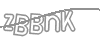

In [28]:
Image.fromarray(np.array(X_test[0].reshape(40, 100), dtype=np.uint8))

In [29]:
res = model.predict(np.array([X_test[0]]).reshape(1, 40, 100, 1))

In [30]:
print(index2ch[res[0].argmax(1)[0]], 
      index2ch[res[1].argmax(1)[0]], 
      index2ch[res[2].argmax(1)[0]], 
      index2ch[res[3].argmax(1)[0]], 
      index2ch[res[4].argmax(1)[0]])

z b b n k


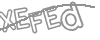

In [49]:
Image.fromarray(np.array(X_test[1].reshape(40, 100), dtype=np.uint8))

In [50]:
res = model.predict(np.array([X_test[1]]).reshape(1, 40, 100, 1))

In [51]:
print(index2ch[res[0].argmax(1)[0]], 
      index2ch[res[1].argmax(1)[0]], 
      index2ch[res[2].argmax(1)[0]], 
      index2ch[res[3].argmax(1)[0]], 
      index2ch[res[4].argmax(1)[0]])

x e f e d
